In [850]:
import pandas as pd

In [851]:
# df = pd.read_csv('C:\\Users\\Dell\\Desktop\\dataset_diabetes\\diabetic_data.csv')
df = pd.read_csv('./dataset_diabetes/diabetic_data.csv')

In [852]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Remove Duplicate DataPoints

In [853]:
df = df.drop_duplicates(subset=['patient_nbr'])

In [854]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71518 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   encounter_id              71518 non-null  int64 
 1   patient_nbr               71518 non-null  int64 
 2   race                      71518 non-null  object
 3   gender                    71518 non-null  object
 4   age                       71518 non-null  object
 5   weight                    71518 non-null  object
 6   admission_type_id         71518 non-null  int64 
 7   discharge_disposition_id  71518 non-null  int64 
 8   admission_source_id       71518 non-null  int64 
 9   time_in_hospital          71518 non-null  int64 
 10  payer_code                71518 non-null  object
 11  medical_specialty         71518 non-null  object
 12  num_lab_procedures        71518 non-null  int64 
 13  num_procedures            71518 non-null  int64 
 14  num_medications      

## Missing data 

In [855]:
import numpy as np

In [856]:
for column in df.columns:
    df[column].replace('?', np.nan, inplace=True)

In [857]:
per_col_null = (df.isnull().sum(axis = 0))/(df.shape[0])

In [858]:
print(per_col_null)

encounter_id                0.000000
patient_nbr                 0.000000
race                        0.027238
gender                      0.000000
age                         0.000000
weight                      0.960108
admission_type_id           0.000000
discharge_disposition_id    0.000000
admission_source_id         0.000000
time_in_hospital            0.000000
payer_code                  0.434059
medical_specialty           0.482074
num_lab_procedures          0.000000
num_procedures              0.000000
num_medications             0.000000
number_outpatient           0.000000
number_emergency            0.000000
number_inpatient            0.000000
diag_1                      0.000154
diag_2                      0.004111
diag_3                      0.017129
number_diagnoses            0.000000
max_glu_serum               0.000000
A1Cresult                   0.000000
metformin                   0.000000
repaglinide                 0.000000
nateglinide                 0.000000
c

### Delete features of irrelevant or high proportion of missing data

In [859]:
df.drop(columns = ['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty'], inplace = True)

In [860]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [861]:
for column in df.columns:
    print('feature = {}'.format(column))
    table = df[column].value_counts()/len(df)
    print(table)

feature = race
Caucasian          0.747938
AfricanAmerican    0.180192
Hispanic           0.021211
Other              0.016471
Asian              0.006949
Name: race, dtype: float64
feature = gender
Female             0.531684
Male               0.468274
Unknown/Invalid    0.000042
Name: gender, dtype: float64
feature = age
[70-80)     0.254621
[60-70)     0.223161
[50-60)     0.174306
[80-90)     0.162043
[40-50)     0.096172
[30-40)     0.037739
[90-100)    0.026567
[20-30)     0.015758
[10-20)     0.007481
[0-10)      0.002153
Name: age, dtype: float64
feature = admission_type_id
1    0.510221
3    0.194594
2    0.182164
6    0.064152
5    0.044380
8    0.004069
7    0.000294
4    0.000126
Name: admission_type_id, dtype: float64
feature = discharge_disposition_id
1     0.619662
3     0.122822
6     0.115901
18    0.034593
2     0.021519
22    0.019715
11    0.015059
5     0.012766
25    0.010878
4     0.007565
7     0.005719
23    0.003635
13    0.003398
14    0.003048
28    0.00125

### Delete Imbalance Feature

In [862]:
df.drop(columns = ['repaglinide', 'nateglinide', 'chlorpropamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
                  'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone',
                  'metformin-rosiglitazone', 'metformin-pioglitazone', 'acetohexamide', 'tolbutamide'], inplace = True)

In [863]:
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,Steady,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO


### Fill Missing data

In [864]:
df['race'] = df['race'].replace(np.nan, 'Other')

In [865]:
df['race'].value_counts()

Caucasian          53491
AfricanAmerican    12887
Other               3126
Hispanic            1517
Asian                497
Name: race, dtype: int64

In [866]:
df['gender'] = df['gender'].replace('Unknown/Invalid', 'Female')

In [867]:
df['gender'].value_counts()

Female    38028
Male      33490
Name: gender, dtype: int64

In [868]:
df['diag_1'] = df['diag_1'].fillna(df['diag_1'].mode()[0])

In [869]:
df['diag_1'].value_counts()

414    5244
428    3980
786    3040
410    2902
486    2439
       ... 
653       1
61        1
145       1
148       1
V51       1
Name: diag_1, Length: 696, dtype: int64

In [870]:
df['diag_2'] = df['diag_2'].fillna(df['diag_2'].mode()[0])
df['diag_3'] = df['diag_3'].fillna(df['diag_3'].mode()[0])

### Feature Fix

#### 1. gender

In [871]:
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)

In [872]:
df['gender'].value_counts()

0    38028
1    33490
Name: gender, dtype: int64

#### 2 .age

In [873]:
for i in range(0, 10):
    df['age'] = df['age'].replace('[{}-{})'.format(10*i, 10*(i+1)), 10*i+5)

In [874]:
df['age'].value_counts()

75    18210
65    15960
55    12466
85    11589
45     6878
35     2699
95     1900
25     1127
15      535
5       154
Name: age, dtype: int64

#### 3. max_glu_serum

In [875]:
df['max_glu_serum']=df['max_glu_serum'].replace("None", 0)
df['max_glu_serum']=df['max_glu_serum'].replace("Norm", 1)
df['max_glu_serum']=df['max_glu_serum'].replace(">200", 2)
df['max_glu_serum']=df['max_glu_serum'].replace(">300", 3)
df.max_glu_serum.value_counts()

0    68062
1     1731
2      969
3      756
Name: max_glu_serum, dtype: int64

#### 4. A1Cresult

In [876]:
df['A1Cresult']=df['A1Cresult'].replace("None", 0)
df['A1Cresult']=df['A1Cresult'].replace("Norm", 1)
df['A1Cresult']=df['A1Cresult'].replace(">7", 2)
df['A1Cresult']=df['A1Cresult'].replace(">8", 3)
df.A1Cresult.value_counts()

0    58532
3     6304
1     3791
2     2891
Name: A1Cresult, dtype: int64

#### 5. Drug

In [877]:
df = df.replace('No', 0)
df = df.replace('Down', 1)
df = df.replace('Steady', 2)
df = df.replace('Up', 3)

In [878]:
df.insulin.value_counts()

0    34921
2    22129
1     7505
3     6963
Name: insulin, dtype: int64

#### 6. Change

In [879]:
df['change'] = df['change'].replace('Ch', 1)
df['change'].value_counts()

0    39494
1    32024
Name: change, dtype: int64

#### 7. diabetesMed

In [880]:
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'].value_counts()

1    54319
0    17199
Name: diabetesMed, dtype: int64

#### 8. Target

In [881]:
df['readmitted']=df['readmitted'].replace('NO', 0)
df['readmitted']=df['readmitted'].replace('>30', 0)
df['readmitted']=df['readmitted'].replace('<30', 1)
df.readmitted.value_counts()

0    65225
1     6293
Name: readmitted, dtype: int64

#### 9. diag_1

In [882]:
df.loc[df['diag_1'].str.contains('V',na=False,case=False), 'diag_1'] = 0
df.loc[df['diag_1'].str.contains('E',na=False,case=False), 'diag_1'] = 0

In [883]:
df['diag_1'] = df['diag_1'].astype(float)
df['diag_1'].loc[(df['diag_1']>=1) & (df['diag_1']< 140)] = 1
df['diag_1'].loc[(df['diag_1']>=140) & (df['diag_1']< 240)] = 2
df['diag_1'].loc[(df['diag_1']>=240) & (df['diag_1']< 280)] = 3
df['diag_1'].loc[(df['diag_1']>=280) & (df['diag_1']< 290)] = 4
df['diag_1'].loc[(df['diag_1']>=290) & (df['diag_1']< 320)] = 5
df['diag_1'].loc[(df['diag_1']>=320) & (df['diag_1']< 390)] = 6
df['diag_1'].loc[(df['diag_1']>=390) & (df['diag_1']< 460)] = 7
df['diag_1'].loc[(df['diag_1']>=460) & (df['diag_1']< 520)] = 8
df['diag_1'].loc[(df['diag_1']>=520) & (df['diag_1']< 580)] = 9
df['diag_1'].loc[(df['diag_1']>=580) & (df['diag_1']< 630)] = 10
df['diag_1'].loc[(df['diag_1']>=630) & (df['diag_1']< 680)] = 11
df['diag_1'].loc[(df['diag_1']>=680) & (df['diag_1']< 710)] = 12
df['diag_1'].loc[(df['diag_1']>=710) & (df['diag_1']< 740)] = 13
df['diag_1'].loc[(df['diag_1']>=740) & (df['diag_1']< 760)] = 14
df['diag_1'].loc[(df['diag_1']>=760) & (df['diag_1']< 780)] = 15
df['diag_1'].loc[(df['diag_1']>=780) & (df['diag_1']< 800)] = 16
df['diag_1'].loc[(df['diag_1']>=800) & (df['diag_1']< 1000)] = 17

/var/folders/sm/6zvlqzvs5pj6xny1fxw01gnh0000gn/T/ipykernel_4833/4235837212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diag_1'].loc[(df['diag_1']>=1) & (df['diag_1']< 140)] = 1
/var/folders/sm/6zvlqzvs5pj6xny1fxw01gnh0000gn/T/ipykernel_4833/4235837212.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diag_1'].loc[(df['diag_1']>=140) & (df['diag_1']< 240)] = 2
/var/folders/sm/6zvlqzvs5pj6xny1fxw01gnh0000gn/T/ipykernel_4833/4235837212.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

#### 10. diag_2

In [884]:
df.loc[df['diag_2'].str.contains('V',na=False,case=False), 'diag_2'] = 0
df.loc[df['diag_2'].str.contains('E',na=False,case=False), 'diag_2'] = 0

In [885]:
df['diag_2'] = df['diag_2'].astype(float)
df['diag_2'].loc[(df['diag_2']>=1) & (df['diag_2']< 140)] = 1
df['diag_2'].loc[(df['diag_2']>=140) & (df['diag_2']< 240)] = 2
df['diag_2'].loc[(df['diag_2']>=240) & (df['diag_2']< 280)] = 3
df['diag_2'].loc[(df['diag_2']>=280) & (df['diag_2']< 290)] = 4
df['diag_2'].loc[(df['diag_2']>=290) & (df['diag_2']< 320)] = 5
df['diag_2'].loc[(df['diag_2']>=320) & (df['diag_2']< 390)] = 6
df['diag_2'].loc[(df['diag_2']>=390) & (df['diag_2']< 460)] = 7
df['diag_2'].loc[(df['diag_2']>=460) & (df['diag_2']< 520)] = 8
df['diag_2'].loc[(df['diag_2']>=520) & (df['diag_2']< 580)] = 9
df['diag_2'].loc[(df['diag_2']>=580) & (df['diag_2']< 630)] = 10
df['diag_2'].loc[(df['diag_2']>=630) & (df['diag_2']< 680)] = 11
df['diag_2'].loc[(df['diag_2']>=680) & (df['diag_2']< 710)] = 12
df['diag_2'].loc[(df['diag_2']>=710) & (df['diag_2']< 740)] = 13
df['diag_2'].loc[(df['diag_2']>=740) & (df['diag_2']< 760)] = 14
df['diag_2'].loc[(df['diag_2']>=760) & (df['diag_2']< 780)] = 15
df['diag_2'].loc[(df['diag_2']>=780) & (df['diag_2']< 800)] = 16
df['diag_2'].loc[(df['diag_2']>=800) & (df['diag_2']< 1000)] = 17

/var/folders/sm/6zvlqzvs5pj6xny1fxw01gnh0000gn/T/ipykernel_4833/577585656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diag_2'].loc[(df['diag_2']>=1) & (df['diag_2']< 140)] = 1
/var/folders/sm/6zvlqzvs5pj6xny1fxw01gnh0000gn/T/ipykernel_4833/577585656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diag_2'].loc[(df['diag_2']>=140) & (df['diag_2']< 240)] = 2
/var/folders/sm/6zvlqzvs5pj6xny1fxw01gnh0000gn/T/ipykernel_4833/577585656.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

#### 11. diag_3

In [886]:
df.loc[df['diag_3'].str.contains('V',na=False,case=False), 'diag_3'] = 0
df.loc[df['diag_3'].str.contains('E',na=False,case=False), 'diag_3'] = 0

In [887]:
df['diag_3'] = df['diag_3'].astype(float)
df['diag_3'].loc[(df['diag_3']>=1) & (df['diag_3']< 140)] = 1
df['diag_3'].loc[(df['diag_3']>=140) & (df['diag_3']< 240)] = 2
df['diag_3'].loc[(df['diag_3']>=240) & (df['diag_3']< 280)] = 3
df['diag_3'].loc[(df['diag_3']>=280) & (df['diag_3']< 290)] = 4
df['diag_3'].loc[(df['diag_3']>=290) & (df['diag_3']< 320)] = 5
df['diag_3'].loc[(df['diag_3']>=320) & (df['diag_3']< 390)] = 6
df['diag_3'].loc[(df['diag_3']>=390) & (df['diag_3']< 460)] = 7
df['diag_3'].loc[(df['diag_3']>=460) & (df['diag_3']< 520)] = 8
df['diag_3'].loc[(df['diag_3']>=520) & (df['diag_3']< 580)] = 9
df['diag_3'].loc[(df['diag_3']>=580) & (df['diag_3']< 630)] = 10
df['diag_3'].loc[(df['diag_3']>=630) & (df['diag_3']< 680)] = 11
df['diag_3'].loc[(df['diag_3']>=680) & (df['diag_3']< 710)] = 12
df['diag_3'].loc[(df['diag_3']>=710) & (df['diag_3']< 740)] = 13
df['diag_3'].loc[(df['diag_3']>=740) & (df['diag_3']< 760)] = 14
df['diag_3'].loc[(df['diag_3']>=760) & (df['diag_3']< 780)] = 15
df['diag_3'].loc[(df['diag_3']>=780) & (df['diag_3']< 800)] = 16
df['diag_3'].loc[(df['diag_3']>=800) & (df['diag_3']< 1000)] = 17

/var/folders/sm/6zvlqzvs5pj6xny1fxw01gnh0000gn/T/ipykernel_4833/2219184801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diag_3'].loc[(df['diag_3']>=1) & (df['diag_3']< 140)] = 1
/var/folders/sm/6zvlqzvs5pj6xny1fxw01gnh0000gn/T/ipykernel_4833/2219184801.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diag_3'].loc[(df['diag_3']>=140) & (df['diag_3']< 240)] = 2
/var/folders/sm/6zvlqzvs5pj6xny1fxw01gnh0000gn/T/ipykernel_4833/2219184801.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

#### 12.race

In [888]:
df['race'] = df['race'].replace('Caucasian', 1)
df['race'] = df['race'].replace('Other', 0)
df['race'] = df['race'].replace('AfricanAmerican', 2)
df['race'] = df['race'].replace('Hispanic', 3)
df['race'] = df['race'].replace('Asian', 4)
df['race'].value_counts()

1    53491
2    12887
0     3126
3     1517
4      497
Name: race, dtype: int64

In [889]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71518 entries, 0 to 101765
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      71518 non-null  int64  
 1   gender                    71518 non-null  int64  
 2   age                       71518 non-null  int64  
 3   admission_type_id         71518 non-null  int64  
 4   discharge_disposition_id  71518 non-null  int64  
 5   admission_source_id       71518 non-null  int64  
 6   time_in_hospital          71518 non-null  int64  
 7   num_lab_procedures        71518 non-null  int64  
 8   num_procedures            71518 non-null  int64  
 9   num_medications           71518 non-null  int64  
 10  number_outpatient         71518 non-null  int64  
 11  number_emergency          71518 non-null  int64  
 12  number_inpatient          71518 non-null  int64  
 13  diag_1                    71518 non-null  float64
 14  diag_

In [890]:
# df.drop(columns = ['encounter_id', 'patient_nbr', 'weight', 'payer_code', 'medical_specialty'], inplace = True)

In [891]:
for col in df.columns:
    print(df.groupby(col)[col].value_counts())

race  race
0     0        3126
1     1       53491
2     2       12887
3     3        1517
4     4         497
Name: race, dtype: int64
gender  gender
0       0         38028
1       1         33490
Name: gender, dtype: int64
age  age
5    5        154
15   15       535
25   25      1127
35   35      2699
45   45      6878
55   55     12466
65   65     15960
75   75     18210
85   85     11589
95   95      1900
Name: age, dtype: int64
admission_type_id  admission_type_id
1                  1                    36490
2                  2                    13028
3                  3                    13917
4                  4                        9
5                  5                     3174
6                  6                     4588
7                  7                       21
8                  8                      291
Name: admission_type_id, dtype: int64
discharge_disposition_id  discharge_disposition_id
1                         1                           44317
2      

In [892]:
from sklearn.model_selection import train_test_split

In [893]:
X, Y = df.iloc[:, :-1].values, df.iloc[:, -1].values

In [894]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [895]:
X_train.shape

(53638, 28)

In [896]:
Y_train.shape

(53638,)

In [897]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [898]:
pipe = Pipeline([
        ('sampling', SMOTE(random_state = 0)),
        ('model', MLPClassifier(random_state=0))
    ])

pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'sampling', 'model', 'sampling__k_neighbors', 'sampling__n_jobs', 'sampling__random_state', 'sampling__sampling_strategy', 'model__activation', 'model__alpha', 'model__batch_size', 'model__beta_1', 'model__beta_2', 'model__early_stopping', 'model__epsilon', 'model__hidden_layer_sizes', 'model__learning_rate', 'model__learning_rate_init', 'model__max_fun', 'model__max_iter', 'model__momentum', 'model__n_iter_no_change', 'model__nesterovs_momentum', 'model__power_t', 'model__random_state', 'model__shuffle', 'model__solver', 'model__tol', 'model__validation_fraction', 'model__verbose', 'model__warm_start'])

In [899]:
param_grid={
'model__hidden_layer_sizes': [(20, 20, 15)],
'model__alpha': [0.34],
'model__activation': ["logistic"]
}

# Recall = TP/TP+FN -> Of the ones that are positive, how many did we indicate as positive
# AUROC = area under curve TPR (TP/TP+FN) vs. FPR (FP/TN+FP) at various thresholds
scoring = ['roc_auc']
clf = GridSearchCV(pipe, param_grid, scoring=scoring, refit='roc_auc', return_train_score=True, n_jobs=20)
best_model = clf.fit(X_train, Y_train)
Y_test_pred = clf.predict(X_test)

/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [900]:
best_model.best_estimator_

Pipeline(steps=[('sampling', SMOTE(random_state=0)),
                ('model',
                 MLPClassifier(activation='logistic', alpha=0.34,
                               hidden_layer_sizes=(20, 20, 15),
                               random_state=0))])

In [901]:
from sklearn.metrics import accuracy_score,balanced_accuracy_score
from sklearn.metrics import precision_recall_curve, recall_score, precision_score
from sklearn.metrics import roc_auc_score

In [902]:
# final_clf = best_model.best_estimator_
# Y_test_pred = final_clf.predict(X_test)

In [903]:
roc_auc_score(Y_test, Y_test_pred)

0.5814831561557703

In [904]:
accuracy_score(Y_test, Y_test_pred)

0.5432326621923937

In [905]:
balanced_accuracy_score(Y_test, Y_test_pred)

0.5814831561557703

In [906]:
precision_score(Y_test, Y_test_pred)

0.11695429104477612

In [907]:
recall_score(Y_test, Y_test_pred)

0.628052598622417

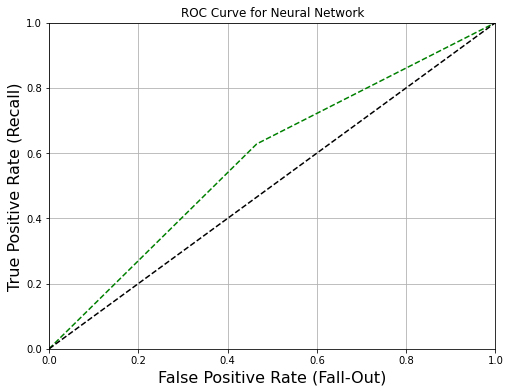

In [912]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(Y_test, Y_test_pred)
def plot_roc_curve(fpr, tpr, label):
    plt.plot(fpr, tpr, linestyle = '--', color = 'green', label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                  # Not shown
plt.title('ROC Curve for Neural Network')
# plt.legend(loc='upper left')
plot_roc_curve(fpr, tpr, label='Neural Network')
